# INFO-F-305 - TP 6
# Simulation à l'aide d'Octave
# Système d'ordre 2
### Jacopo De Stefani - __[jdestefa@ulb.ac.be](mailto:jdestefa@ulb.ac.be)__
### Github: https://github.com/jdestefani/ulb-infof305-1819
### Slides: https://jdestefani.github.io/ulb-infof305-1819/

# Comment installer Octave / Jupyter?

- **Octave**: Plus d'informations ici: https://www.gnu.org/software/octave/
- **Jupyter Notebook**: https://jupyter.readthedocs.io/en/latest/install.html
- **Octave kernel for Jupyter**: https://github.com/Calysto/octave_kernel
- **Symbolic package (Octave forge)**: https://octave.sourceforge.io/symbolic/index.html


# Comment utiliser les notebooks?

1. Installer Octave, Jupyter Notebook et le kernel Octave pour Jupyter.
2. Se déplacer dans le dossier où les notebooks sont stockés.
3. Démarrer ```jupyter notebook``` 
4. Selectionner le notebook dans l'interface web. 


# Système du second ordre - Bases

$\dot{\mathbf{X}}(t) = \mathbf{A}\mathbf{X}(t)$

$\begin{bmatrix}\dot{x_{1}}\\
\dot{x_{2}}\end{bmatrix}=\begin{bmatrix}a_{11} & a_{12}\\
a_{21} & a_{22}\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\end{bmatrix}$

1. Dessin d'une trajectoire
2. Dessin des droites invariantes
3. Dessin des isoclines
4. Dessin du portrait de phase
5. Dessin du diagramme tr(A) - det(A)


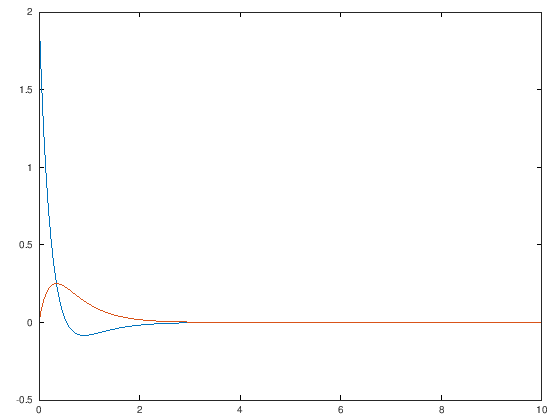

In [67]:
function [t,x] = system_simulation(A)
    ode_sys = @(t,x) [A(1,1)*x(1)+A(1,2)*x(2);A(2,1)*x(1)+A(2,2)*x(2)]; # Définition système
    [t,x] = ode23 (ode_sys, [0, 10], [2, 0]); # Résolution système
endfunction

A = [-5 -3; 1 -1];
[t,x] = system_simulation(A);
plot(t,x)

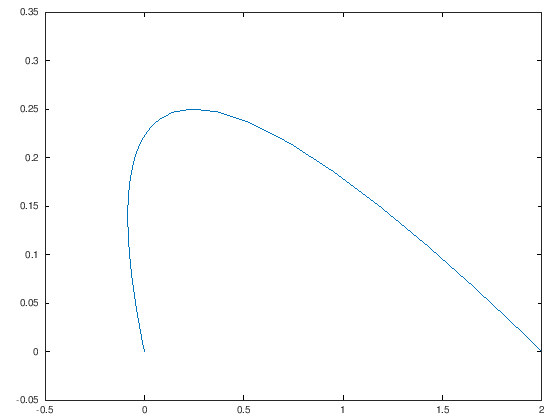

In [68]:
plot(x(:,1),x(:,2))

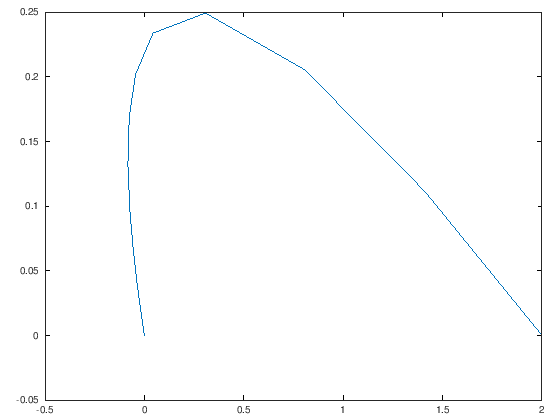

In [69]:
# Implémentation 2

sys_str = sprintf('[%f*x(1)+%f*x(2);%f*x(1)+%f*x(2)]',A(1,1),A(1,2),A(2,1),A(2,2)); # Définition système (1)
sys_ode = inline(sys_str,'t','x'); # Définition système (2)
[ts,ys] = ode45(sys_ode,[0,20],[2,0]); # Résolution système
plot(ys(:,1),ys(:,2))

In [70]:
# 2. Dessiner les droites correspondants aux vecteurs propres et le sense des trajectoires associés
function [eigenline_1,eigenline_2,V] = compute_eigenlines(A,line_range)
    [V,L] = eig(A);
    eigenline_1 = (V(2,1)/V(1,1)) * line_range;
    eigenline_2 = (V(2,2)/V(1,2)) * line_range;
endfunction

function [line_range,eigenline_1,eigenline_2] = plot_eigenlines(A)
    line_range = -1.5:.1:1.5;
    [eigenline_1,eigenline_2,V] = compute_eigenlines(A,line_range);
    hold on;
    plot(line_range,eigenline_1,"linewidth",10);
    plot(line_range,eigenline_2,"linewidth",10);
    quiver([0;0],[0;0],V(1,:),V(2,:),"linewidth",10,"color","k");
    legend("v_1","v_2","location","south");
endfunction

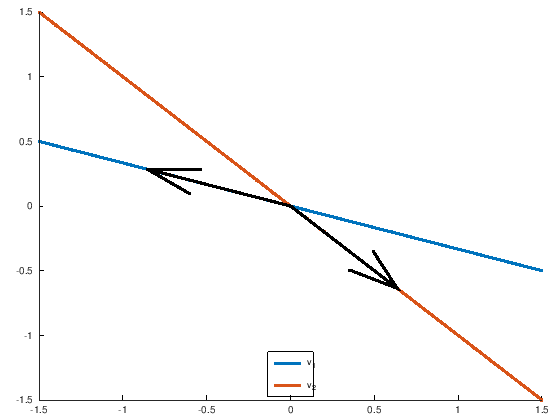

In [71]:
[line_range,eigenline_1,eigenline_2] = plot_eigenlines(A);

In [72]:
# 3. Calculer les isoclines
function [isocline_1,isocline_2] = compute_isoclines(A,line_range)
    isocline_1 = -(A(1,1)/A(1,2)) * line_range;
    isocline_2 = -(A(2,1)/A(2,2)) * line_range;
endfunction

function [line_range,isocline_1,isocline_2] = plot_isoclines(A)
    line_range = -1.5:.1:1.5;
    [isocline_1,isocline_2] = compute_isoclines(A,line_range);
    hold on;
    plot(line_range,isocline_1,"linewidth",5);
    plot(line_range,isocline_2,"linewidth",5);
    legend("isocline_1","isocline_2","location","south");
endfunction

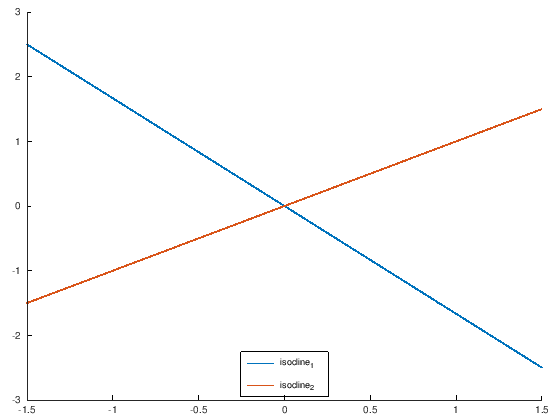

In [73]:
[line_range,isocline_1,isocline_2] = plot_isoclines(A);

In [74]:
# 4. Portrait de phase
function [x1,x2,x1p,x2p] = plot_portrait_phase(A)
    #grid for plotting
    x1range=-1.5:.1:1.5;
    x2range=-1.5:.1:1.5;
    [x1,x2] = meshgrid(x1range, x2range);

    # Define the system to plot (based on matrix A)
    x1p = A(1,1)*x1+A(1,2)*x2;
    x2p = A(2,1)*x1+A(2,2)*x2;

    #Normalize values for plotting
    norms=sqrt(x1p.^2+x2p.^2);
    # Vector field plot
    hold on;
    quiver(x1,x2,x1p./norms,x2p./norms,0.5);
endfunction

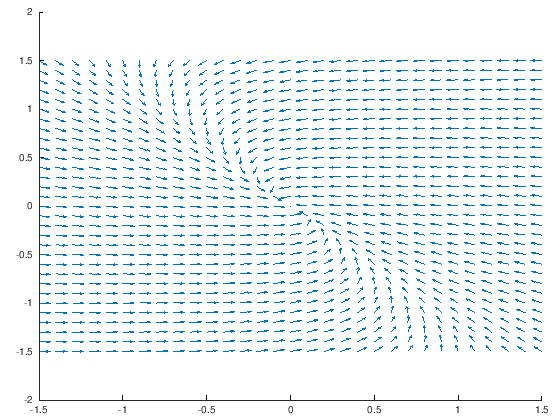

In [75]:
[x1,x2,x1p,x2p] = plot_portrait_phase(A);

In [76]:
# 4. Portrait de phase complet
function [x1,x2,x1p,x2p] = plot_portrait_phase_complete(A)
    #grid for plotting
    x1range=-1.5:.1:1.5;
    x2range=-1.5:.1:1.5;
    [x1,x2] = meshgrid(x1range, x2range);

    # Define the system to plot (based on matrix A)
    x1p = A(1,1)*x1+A(1,2)*x2;
    x2p = A(2,1)*x1+A(2,2)*x2;

    #Normalize values for plotting
    norms=sqrt(x1p.^2+x2p.^2);
    
    [eigenline_1,eigenline_2,V] = compute_eigenlines(A,x1range);
    [isocline_1,isocline_2] = compute_isoclines(A,x1range);
    
    # Vector field plot
    hold on;
    quiver(x1,x2,x1p./norms,x2p./norms,0.5);
    # Isoclines
    plot(x1range,isocline_1,"linewidth",5);
    plot(x1range,isocline_2,"linewidth",5);
    # Vecteurs propres
    plot(x1range,eigenline_1,"linewidth",5);
    plot(x1range,eigenline_2,"linewidth",5);
    legend("field","v_1","v_2","isocline_1","isocline_2","location","south","orientation", "horizontal");
    
endfunction

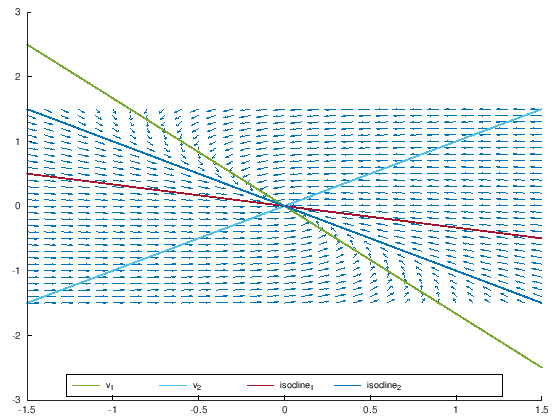

In [77]:
[x1,x2,x1p,x2p] = plot_portrait_phase_complete(A);

In [78]:
pkg load symbolic
syms x1(t) x2(t);
ode_sys = [diff(x1(t),t) == A(1,1)*x1(t) + A(1,2)*x2(t);  diff(x2(t),t) == A(2,1)*x1(t) + A(2,2)*x2(t)]
solutions = dsolve(ode_sys);
solutions{1}
solutions{2}

Symbolic pkg v2.7.1: Python communication link active, SymPy v1.3.
ode_sys = (sym 2×1 matrix)

  ⎡d                             ⎤
  ⎢──(x₁(t)) = -5⋅x₁(t) - 3⋅x₂(t)⎥
  ⎢dt                            ⎥
  ⎢                              ⎥
  ⎢  d                           ⎥
  ⎢  ──(x₂(t)) = x₁(t) - x₂(t)   ⎥
  ⎣  dt                          ⎦

ans = (sym)

                  -2⋅t         -4⋅t
  x₁(t) = - 3⋅C₁⋅ℯ     - 3⋅C₂⋅ℯ    

ans = (sym)

                -2⋅t       -4⋅t
  x₂(t) = 3⋅C₁⋅ℯ     + C₂⋅ℯ    



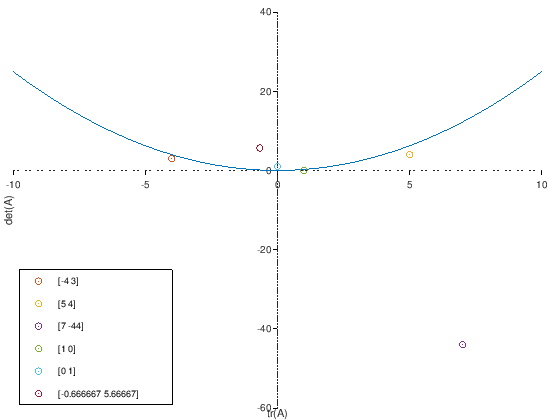

In [79]:
# Plan Tr(A)-det(A)

x = -10:0.1:10;
plot (x, 1/4*x.^2);
hold on;
A_vec = [[-2 1; 1 -2];[2 1; 2 3];[5 9; 6 2];[0 1; 0 1];[0 -1; 1 0];[1/3 -2; 3 -1]]; #cbind like
i = 0;
while i<(rows(A_vec)/2)# Column-wise iteration
    A = A_vec(2*i+1:2*(i+1),1:2); # Get the proper submatrix
    plot(trace(A),det(A),sprintf(";[%d %d];o",trace(A),det(A)))
    i++;
endwhile
set(gca, "xaxislocation", "origin");
set(gca, "yaxislocation", "origin");
h = legend; legend(h,"location","southwest");
xlabel("tr(A)");
ylabel("det(A)");
box off;
hold off;

In [80]:
# Fuction to avoid repetition of phase portrait code
function portrait_phase_single_x_0(A,t_range,x_0)
    # Define grid for plotting
    x1range=-1.5:.1:1.5;
    x2range=-1.5:.1:1.5;
    [x1,x2] = meshgrid(x1range, x2range);

# Define the system to plot (based on matrix A)
    x1p = A(1,1)*x1+A(1,2)*x2;
    x2p = A(2,1)*x1+A(2,2)*x2;

    #Normalize values for plotting
    arrow=sqrt(x1p.^2+x2p.^2);
    # Vector field plot
    hold on;
    quiver(x1,x2,x1p./arrow,x2p./arrow,0.5);
    # Trajectory computation
    sys_str = sprintf('[%d*x(1)+%d*x(2);%d*x(1)+%d*x(2)]',A(1,1),A(1,2),A(2,1),A(2,2));
    sys_ode = inline(sys_str,'t','x');
    # Trajectory plot
    [t,x] = ode45(sys_ode,t_range,x_0);
    plot(x(:,1),x(:,2))
    grid on;
    axis tight;
endfunction

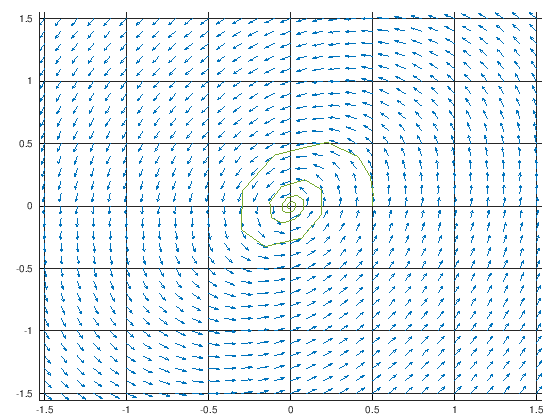

In [81]:
portrait_phase_single_x_0(A,[0,10],[0.5;0])

In [82]:
function portrait_phase_20_rand_x_0(A,t_range,x_range,y_range)
    # Define grid for plotting
    x1range=-1.5:.1:1.5;
    x2range=-1.5:.1:1.5;
    [x1,x2] = meshgrid(x1range, x2range);

    # Define the system to plot (based on matrix A)
    x1p = A(1,1)*x1+A(1,2)*x2;
    x2p = A(2,1)*x1+A(2,2)*x2;

    #Normalize values for plotting
    norms=sqrt(x1p.^2+x2p.^2);
    # Vector field plot
    hold on;
    quiver(x1,x2,x1p./norms,x2p./norms,0.5);
    
    sys_str = sprintf('[%d*x(1)+%d*x(2);%d*x(1)+%d*x(2)]',A(1,1),A(1,2),A(2,1),A(2,2));
    sys_ode = inline(sys_str,'t','x');
    [x_grid,y_grid] = meshgrid(x_range, y_range);
    for i=0:1:20
        # Trajectory calculation
        x_0 = [x_grid(1,randi(size(x_grid,2),1));y_grid(randi(size(y_grid,2),1),1)];
        [t,x] = ode45(sys_ode,t_range,x_0);
        # Trajectory plot
        plot(x(:,1),x(:,2),sprintf(";[%d %d];o-",x_0))
    end
    grid on;
    axis tight;
    h = legend; legend(h,"location","southeastoutside");
endfunction

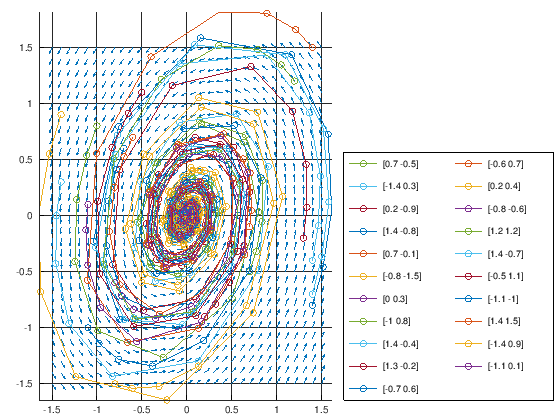

In [83]:
portrait_phase_20_rand_x_0(A,[0,10],-1.5:.1:1.5,-1.5:.1:1.5)

# Cas d'étude 1 - Selle

$\begin{bmatrix}\dot{x_{1}}\\
\dot{x_{2}}\end{bmatrix}=\begin{bmatrix}1 & 3\\
3 & 1\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\end{bmatrix}$


- Conditions initiales: $\mathbf{x}(0)=[0.5,0]$
- Temps de simulation: $[0,1]$ 
- Fonction(s) d'entrée: $\emptyset$


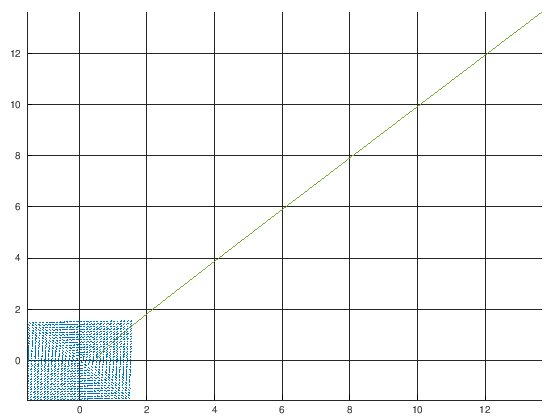

In [84]:
portrait_phase_single_x_0([1 3;3 1],[0,1],[0.5;0])

# Cas d'étude 2 - Selle

$\begin{bmatrix}\dot{x_{1}}\\
\dot{x_{2}}\end{bmatrix}=\begin{bmatrix}1 & 3\\
3 & 1\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\end{bmatrix}$


- Conditions initiales: $\mathbf{x}(0)=[-0.5,0]$
- Temps de simulation: $[0,1]$ 
- Fonction(s) d'entrée: $\emptyset$


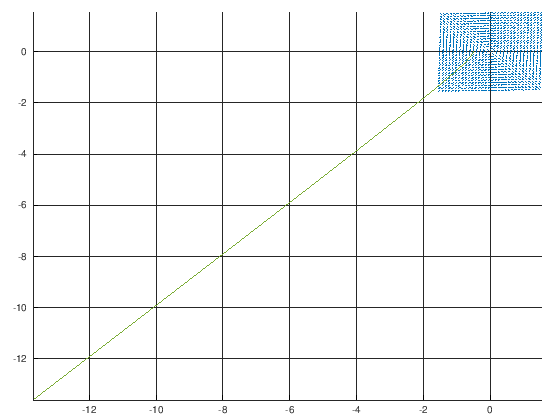

In [85]:
portrait_phase_single_x_0([1 3;3 1],[0,1],[-0.5;0])

# Cas d'étude 3 - Selle

$\begin{bmatrix}\dot{x_{1}}\\
\dot{x_{2}}\end{bmatrix}=\begin{bmatrix}1 & 3\\
3 & 1\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\end{bmatrix}$


- Conditions initiales: 20 vecteurs choisis de manière aléatoire uniforme
dans la région $[-2,2]\times[-2,2]$
- Temps de simulation: $[0,1]$ 
- Fonction(s) d'entrée: $\emptyset$


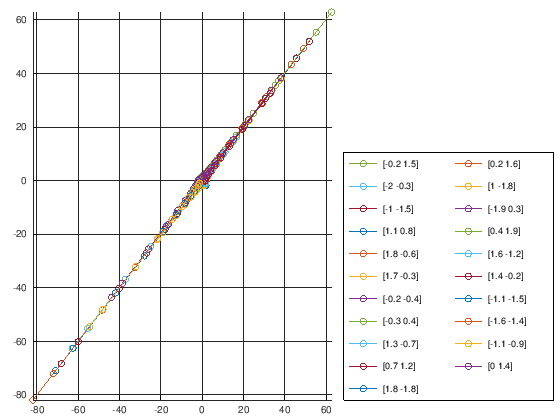

In [86]:
portrait_phase_20_rand_x_0([1 3;3 1],[0,1],-2:.1:2,-2:.1:2)

# Cas d'étude 4: noeud stable

$\begin{bmatrix}\dot{x_{1}}\\
\dot{x_{2}}\end{bmatrix}=\begin{bmatrix}-4 & -2\\
3 & -11\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\end{bmatrix}$


- Conditions initiales: $\mathbf{x}(0)=[1.5,0]$ 
- Intervalle de temps de simulation $[0,1]$. 
- Fonction(s) d'entrée: $\emptyset$ 


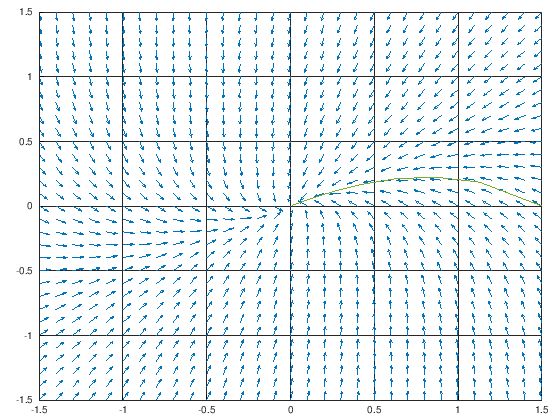

In [87]:
portrait_phase_single_x_0([-4 -2;3 -11],[0,1],[1.5;0])

# Cas d'étude 5: noeud stable

$\begin{bmatrix}\dot{x_{1}}\\
\dot{x_{2}}\end{bmatrix}=\begin{bmatrix}-4 & -2\\
3 & -11\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\end{bmatrix}$


- Conditions initiales: $\mathbf{x}(0)=[-1.5,-1.5]$ 
- Intervalle de temps de simulation $[0,1]$. 
- Fonction(s) d'entrée: $\emptyset$

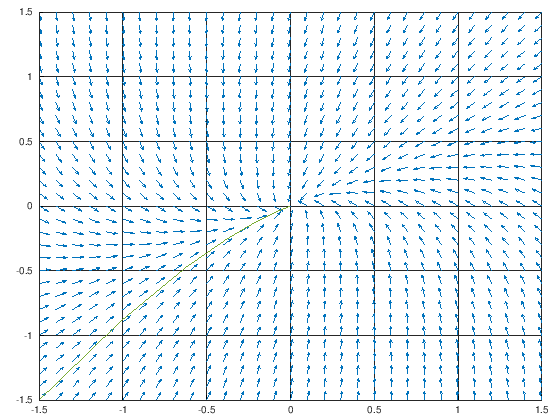

In [88]:
portrait_phase_single_x_0([-4 -2;3 -11],[0,1],[-1.5;-1.5])

# Cas d'étude 6: noeud stable

$\begin{bmatrix}\dot{x_{1}}\\
\dot{x_{2}}\end{bmatrix}=\begin{bmatrix}-4 & -2\\
3 & -11\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\end{bmatrix}$


- Conditions initiales: 20 vecteurs choisis de manière aléatoire uniforme
dans la région $[-2,2]\times[-2,2]$
- Intervalle de temps de simulation $[0,1]$. 
- Fonction(s) d'entrée: $\emptyset$

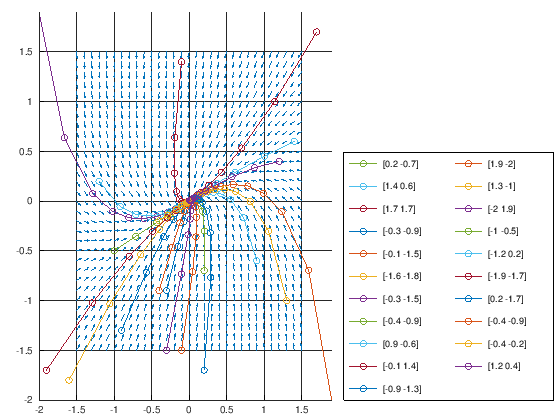

In [89]:
portrait_phase_20_rand_x_0([-4 -2;3 -11],[0,1],-2:.1:2,-2:.1:2)

# Cas d'étude 7: noeud instable 

$\begin{bmatrix}\dot{x_{1}}\\
\dot{x_{2}}\end{bmatrix}=\begin{bmatrix}4 & 2\\
-3 & 11\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\end{bmatrix}$


- Conditions initiales: 20 vecteurs choisis de manière aléatoire uniforme
dans la région $[-2,2]\times[-2,2]$
- Intervalle de temps de simulation $[0,1]$. 
- Fonction(s) d'entrée: $\emptyset$

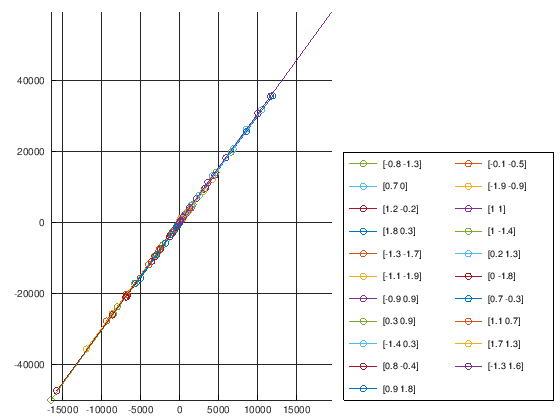

In [90]:
portrait_phase_20_rand_x_0([4 2;-3 11],[0,1],-2:.1:2,-2:.1:2)

# Cas d'étude 8: une valeur propre nulle

$\begin{bmatrix}\dot{x_{1}}\\
\dot{x_{2}}\end{bmatrix}=\begin{bmatrix}-1 & -3\\
-1 & -3\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\end{bmatrix}$


- Conditions initiales: 20 vecteurs choisis de manière aléatoire uniforme
dans la région $[-2,2]\times[-2,2]$
- Intervalle de temps de simulation $[0,1]$. 
- Fonction(s) d'entrée: $\emptyset$

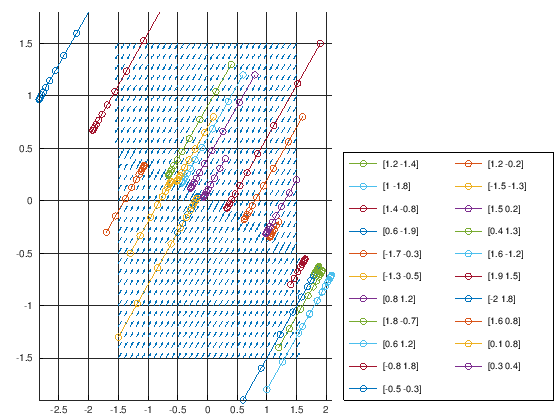

In [91]:
portrait_phase_20_rand_x_0([-1 -3;-1 -3],[0,1],-2:.1:2,-2:.1:2)

# Cas d'étude 9: centre elliptique

$\begin{bmatrix}\dot{x_{1}}\\
\dot{x_{2}}\end{bmatrix}=\begin{bmatrix}0 & 4\\
-1 & 0\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\end{bmatrix}$


- Conditions initiales: 20 vecteurs choisis de manière aléatoire uniforme
dans la région $[-2,2]\times[-2,2]$
- Intervalle de temps de simulation $[0,10]$. 
- Fonction(s) d'entrée: $\emptyset$ 

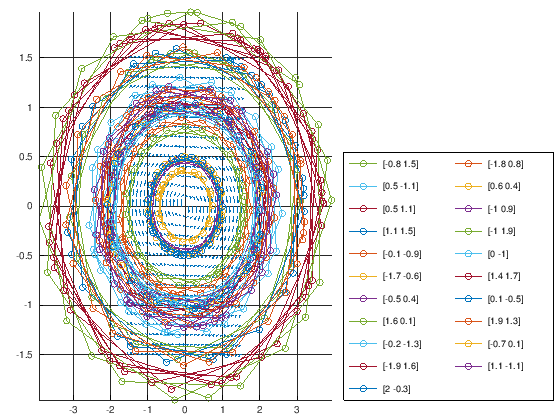

In [92]:
portrait_phase_20_rand_x_0([0 4;-1 0],[0,10],-2:.1:2,-2:.1:2)

# Cas d'étude 10: foyer stable

$\begin{bmatrix}\dot{x_{1}}\\
\dot{x_{2}}\end{bmatrix}=\begin{bmatrix}-4 & 5\\
-5 & 2\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\end{bmatrix}$


- Conditions initiales: 20 vecteurs choisis de manière aléatoire uniforme
dans la région $[-2,2]\times[-2,2]$
- Intervalle de temps de simulation $[0,10]$. 
- Fonction(s) d'entrée: $\emptyset$ 

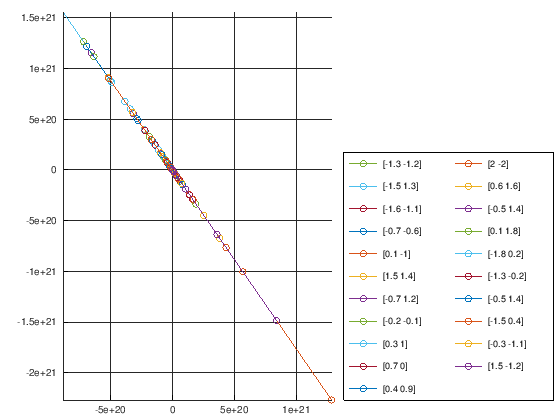

In [93]:
portrait_phase_20_rand_x_0([-4 -5;-5 2],[0,10],-2:.1:2,-2:.1:2)

# Cas d'étude 11: Noeud impropre (stable dégénéré)

$\begin{bmatrix}\dot{x_{1}}\\
\dot{x_{2}}\end{bmatrix}=\begin{bmatrix}-2 & 1\\
-1 & 0\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\end{bmatrix}$


- Conditions initiales: 20 vecteurs choisis de manière aléatoire uniforme
dans la région $[-2,2]\times[-2,2]$
- Intervalle de temps de simulation $[0,10]$. 
- Fonction(s) d'entrée: $\emptyset$ 

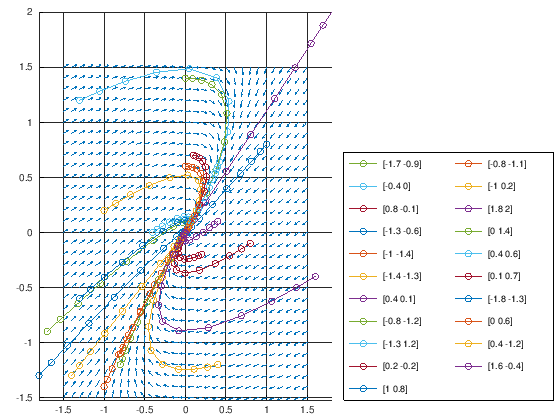

In [94]:
portrait_phase_20_rand_x_0([-2 1;-1 0],[0,10],-2:.1:2,-2:.1:2)

# Cas d'étude 12: étoile

$\begin{bmatrix}\dot{x_{1}}\\
\dot{x_{2}}\end{bmatrix}=\begin{bmatrix}-1 & 0\\
0 & -1\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\end{bmatrix}$


- Conditions initiales: 20 vecteurs choisis de manière aléatoire uniforme
dans la région $[-2,2]\times[-2,2]$
- Intervalle de temps de simulation $[0,10]$. 
- Fonction(s) d'entrée: $\emptyset$ 

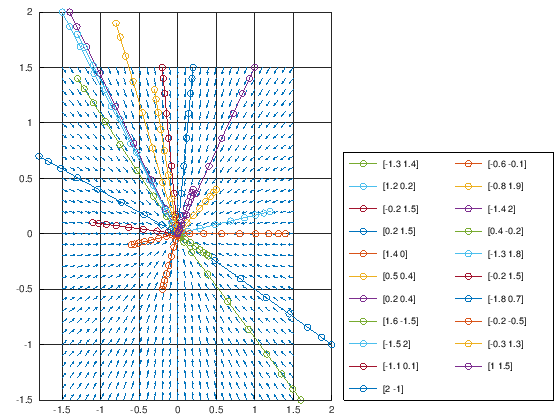

In [95]:
portrait_phase_20_rand_x_0([-1 0;0 -1],[0,10],-2:.1:2,-2:.1:2)